# Anxiety Level Classification using Machine Learning




## Problem Statement
Anxiety is becoming more common, but it is not always easy to identify it early. Factors like sleep habits, stress, physical activity, and health conditions can give useful signals, but they are hard to analyze manually.

In this project, I used historical data and applied a machine learning classification model to learn patterns from these factors and identify anxiety levels.

## Project Overview
The goal of this project is to use lifestyle, health, and behavior-related data to identify anxiety levels.

Instead of predicting an exact anxiety score, the data was grouped into categories so the model can classify individuals more clearly.


## Target Users 

This project is useful for individuals, students, and wellness professionals who want to understand anxiety risk using lifestyle, behavior, and health-related information.

It gives a simple indication of whether anxiety levels are low or high, which can help users decide if they should consider further professional help.


## Data Description

- **Data Source:** Kaggle
- **Total Records:** 11,000
- **Total Features:** 18
- **Target Variable:** Anxiety Level (1-10)

### Key Features:
- Age
- Sleep Hours
- Physical Activity
- Stress Level
- Therapy Sessions
- Caffeine Intake
- Lifestyle and Medical Indicators




In [1]:
''' NumPy and Pandas were used to work with the data.
Seaborn and Matplotlib were used for data visualization.
Warnings were ignored to keep the output clean.'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Initial Data Inspection

The first few rows of the dataset were checked to confirm that the data was loaded correctly and to get a basic understanding of the features.


In [2]:
# The dataset was loaded from a CSV file into a Pandas DataFrame for further analysis.
df=pd.read_csv("enhanced_anxiety_dataset.csv")
df.head()


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


## Dataset Structure and Summary

- `df.info()` was used to examine data types and confirm that there are no missing values


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [4]:
# This step was used to check how many records fall under each anxiety level.
df["Anxiety Level (1-10)"].value_counts().sort_values(ascending=False)

Anxiety Level (1-10)
4.0     2416
3.0     2407
2.0     1756
5.0     1629
1.0     1039
6.0      616
8.0      363
9.0      329
10.0     322
7.0      123
Name: count, dtype: int64

## Exploratory Data Analysis and Preprocessing


In [5]:
'''This step was used to check for missing values in the dataset.
The result showed that there are no null values present.'''
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [6]:
'''This step was used to check for duplicate records in the dataset.
The result showed that there are no duplicate rows in the data.'''
df.duplicated().sum()

np.int64(0)

In [7]:
# This step was used to identify all numerical columns in the dataset.
num_cols=df.select_dtypes(["int","float"]).columns
num_cols

Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
       'Therapy Sessions (per month)', 'Diet Quality (1-10)',
       'Anxiety Level (1-10)'],
      dtype='object')

<Axes: >

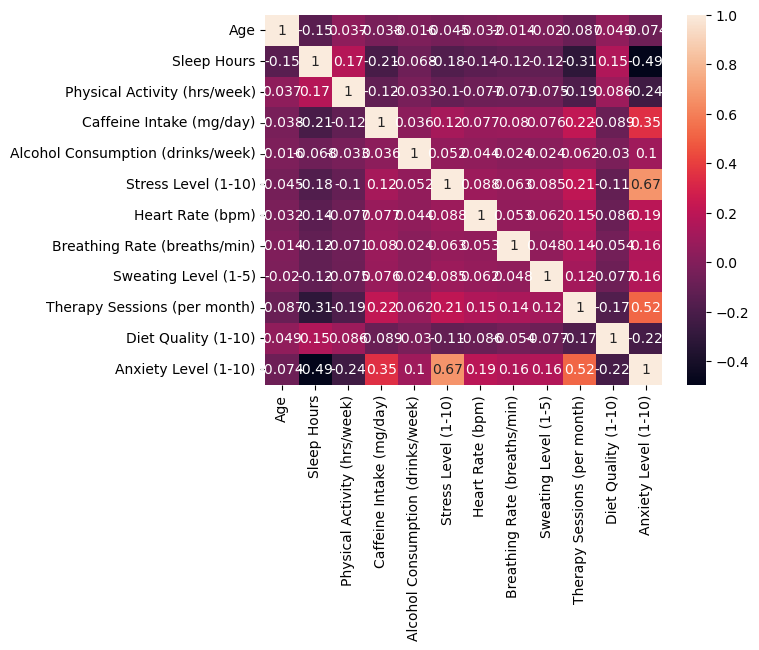

In [8]:
'''This heatmap shows the relationship between numerical variables in the dataset.
It helps to understand how different features are related to each other and how strongly they are connected to anxiety level.'''
sns.heatmap(df[num_cols].corr(), annot=True)

## Numerical Data Summary and Skewness Observation

The `describe()` function was used to understand the basic statistical properties of numerical features such as mean, standard deviation, minimum, and maximum values.

From the summary:
- Most of the values look normal and are within a proper range.
- **Therapy Sessions (per month)** and **Caffeine Intake (mg/day)** show a right-skewed pattern because a few values are much higher than the rest.
- **Sleep Hours** show a slight left-skew, but it is not significant. No incorrect or extreme values were found in the numerical data.

In [9]:
df[num_cols].describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [10]:
# This was used to calculate skewness of numerical columns.
'''
Features that are approximately normally distributed include Age, Alcohol Consumption, Stress Level, Heart Rate, Breathing Rate, Sweating Level, and Diet Quality.
Features that show a slight left-skewed distribution include Sleep Hours
Features that show a right-skewed distribution include Physical Activity, Caffeine Intake, Therapy Sessions per Month, and Anxiety Level.

Skewness was not removed because it is not very high for most features, and the data still represents real-world behavior. Changing it could remove useful information, 
and the models used can handle this level of skewness.
'''
from scipy.stats import skew
df[num_cols].skew()



Age                                  0.097336
Sleep Hours                         -0.224472
Physical Activity (hrs/week)         0.507010
Caffeine Intake (mg/day)             0.323941
Alcohol Consumption (drinks/week)   -0.023334
Stress Level (1-10)                 -0.160872
Heart Rate (bpm)                    -0.119204
Breathing Rate (breaths/min)        -0.141205
Sweating Level (1-5)                -0.073929
Therapy Sessions (per month)         1.035117
Diet Quality (1-10)                  0.161948
Anxiety Level (1-10)                 1.043996
dtype: float64

## Outlier Detection using Boxplots

Boxplots were used to visually identify outliers in numerical features.

From the analysis:
- **Therapy Sessions (per month)** shows a few higher values, indicating that some individuals attend therapy more frequently.
- **Physical Activity (hrs/week)** contains some higher values, which may represent individuals with very active lifestyles.
- **Sleep Hours** shows a few lower and higher values, reflecting irregular sleep patterns in some individuals.

These values are not incorrect or abnormal in a real-world context and represent valid behavioral differences among individuals.

No outlier removal was performed. Keeping these values helps preserve important information in the dataset.


Age


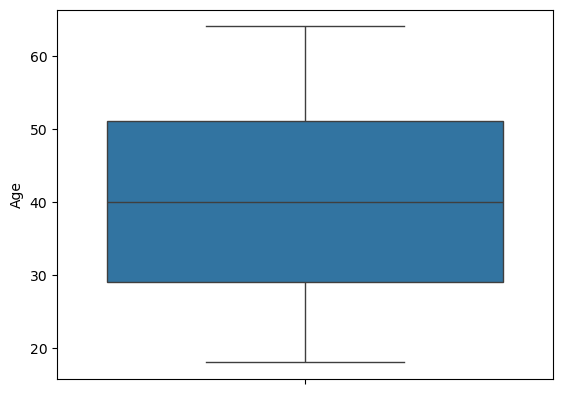

Sleep Hours


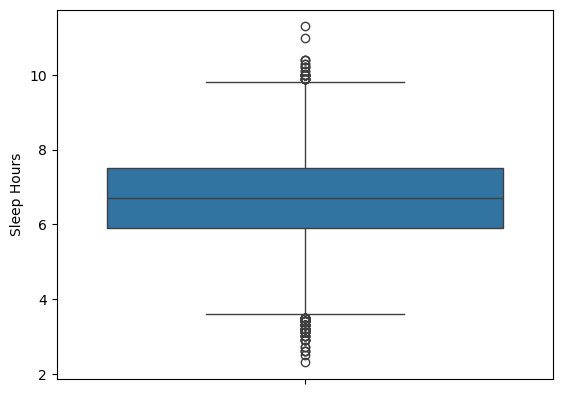

Physical Activity (hrs/week)


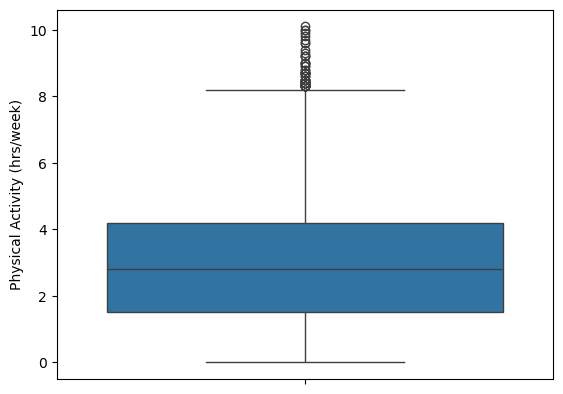

Caffeine Intake (mg/day)


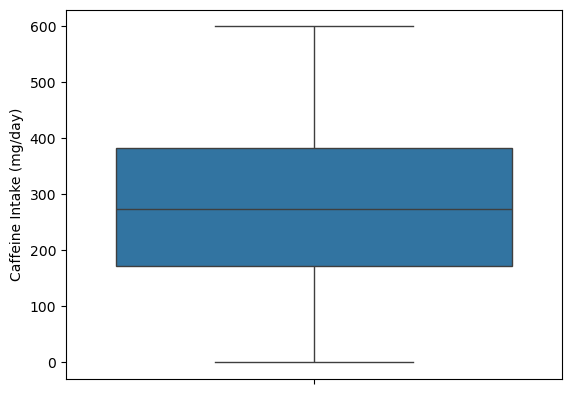

Alcohol Consumption (drinks/week)


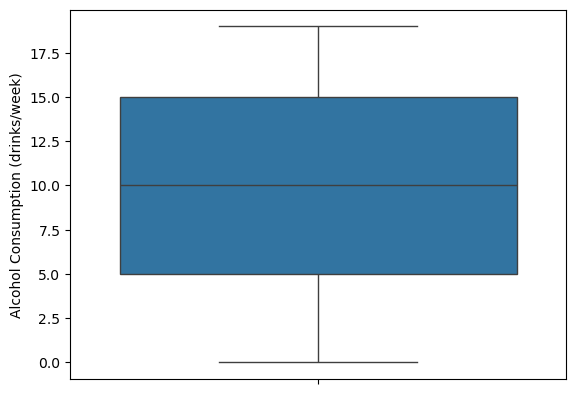

Stress Level (1-10)


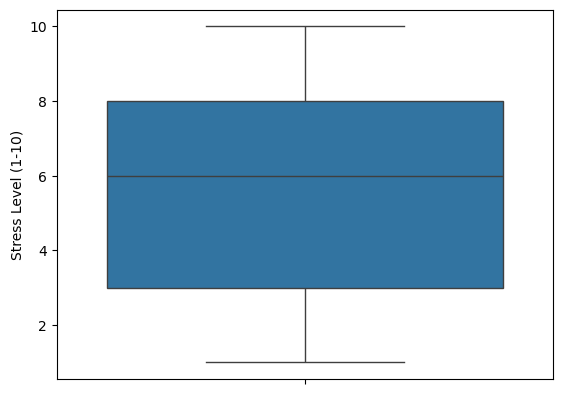

Heart Rate (bpm)


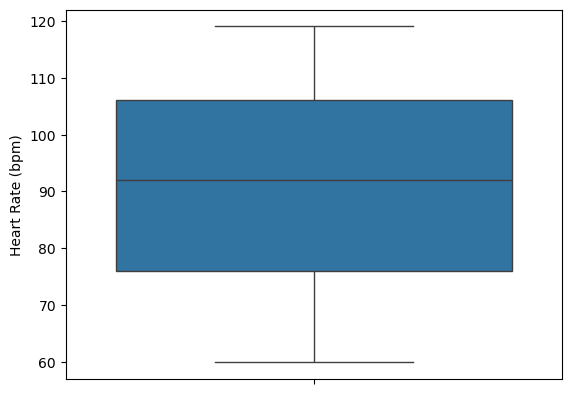

Breathing Rate (breaths/min)


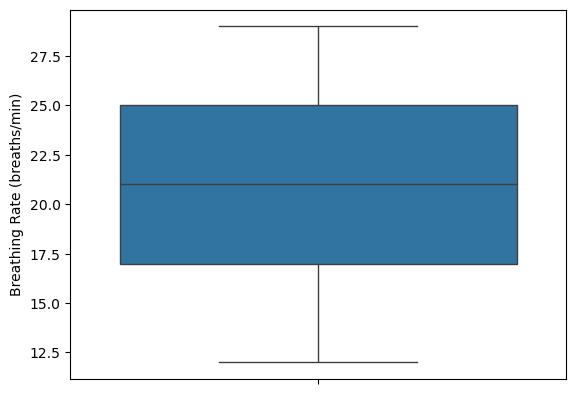

Sweating Level (1-5)


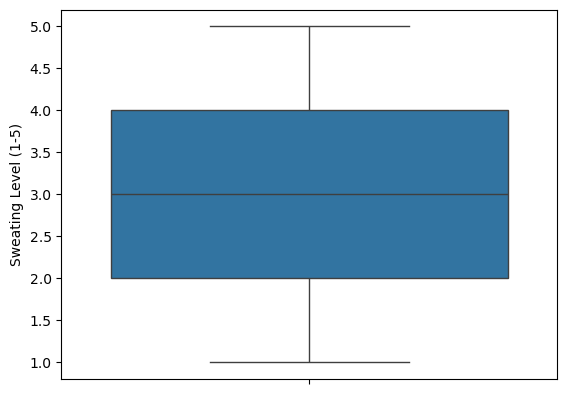

Therapy Sessions (per month)


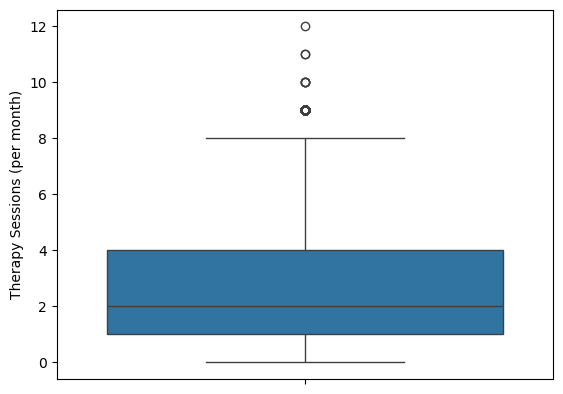

Diet Quality (1-10)


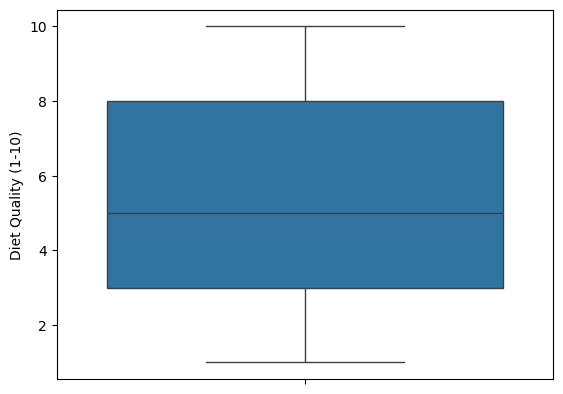

Anxiety Level (1-10)


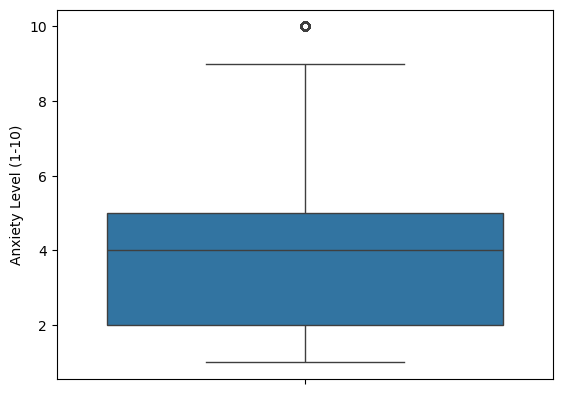

In [11]:
for i in num_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

## Encoding Categorical Variables

The dataset contains several categorical (object-type) features such as gender, occupation, and health-related indicators. Since machine learning models cannot work with text data, these columns needed to be converted into numerical form.

All object-type columns were encoded using OrdinalEncoder. This method assigns a unique numerical value to each category, allowing the model to process the data correctly.

After encoding, all categorical features were successfully transformed, and the dataset became ready for model training.

---

In [12]:
#object encoding 
'''This step was used to identify all object-type (categorical) columns in the dataset so they could be encoded before model training.'''
obj_cols=df.select_dtypes("object").columns
obj_cols

Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object')

In [13]:
for i in obj_cols:
    print(f"{i}: {df[i].value_counts()}")

'''
This step was used to check the different categories and their counts in each object-type column. It helps to understand how the data is distributed across categories 
like gender, occupation, smoking habit, family history of anxiety, and other health-related factors.
'''

Gender: Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64
Occupation: Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64
Smoking: Smoking
Yes    5779
No     5221
Name: count, dtype: int64
Family History of Anxiety: Family History of Anxiety
Yes    5847
No     5153
Name: count, dtype: int64
Dizziness: Dizziness
Yes    5672
No     5328
Name: count, dtype: int64
Medication: Medication
Yes    5666
No     5334
Name: count, dtype: int64
Recent Major Life Event: Recent Major Life Event
Yes    5623
No     5377
Name: count, dtype: int64


'\nThis step was used to check the different categories and their counts in each object-type column. It helps to understand how the data is distributed across categories \nlike gender, occupation, smoking habit, family history of anxiety, and other health-related factors.\n'

In [14]:
'''
Object columns were converted into numerical form using OrdinalEncoder so the model could process them
'''
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[obj_cols]=enc.fit_transform(df[obj_cols])



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  float64
 2   Occupation                         11000 non-null  float64
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  float64
 8   Family History of Anxiety          11000 non-null  float64
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [16]:
feature=df.drop(columns="Anxiety Level (1-10)")
target=df["Anxiety Level (1-10)"]

'''
This step was used to separate the input features from the target variable. All columns except the anxiety level were taken as features,
and the anxiety level column was selected as the target for model training.
'''

'\nThis step was used to separate the input features from the target variable. All columns except the anxiety level were taken as features,\nand the anxiety level column was selected as the target for model training.\n'

feature values were scaled using StandardScaler so that all features are on a similar scale. This helps the model train more effectively and prevents features with larger values from dominating the learning process.

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
feature.iloc[:]=ss.fit_transform(feature.iloc[:])

In [18]:
feature.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10)
0,-0.849359,-1.211023,-1.597525,-0.530115,-0.132478,-0.725727,0.052442,0.950496,-1.065213,1.415627,1.332415,-1.348395,0.657245,-1.031777,0.970260,0.262107,0.977881,0.628018
1,0.435061,1.237062,0.539177,-0.367176,1.508891,-0.594517,-0.299086,0.950496,0.938779,-1.659122,-1.669040,0.395834,-0.772538,0.969201,-1.030651,-0.195977,-1.022619,0.973428
2,1.795036,0.013019,0.806265,-1.344810,0.414645,-1.167696,-1.002141,-1.052082,0.938779,-1.659122,0.004849,1.364850,-0.057646,-1.031777,-1.030651,-0.654060,0.977881,-1.444441
3,-1.529347,-1.211023,1.073353,-0.693054,-0.077766,0.510405,-0.650614,0.950496,-1.065213,-0.634206,-0.283753,-0.766985,-0.057646,-1.031777,-1.030651,-1.112144,-1.022619,-1.444441
4,0.661724,-1.211023,0.806265,1.262214,-0.351328,-0.269946,-1.002141,0.950496,-1.065213,-1.659122,0.408890,-0.379379,0.657245,0.969201,0.970260,-0.654060,-1.022619,-0.753622



## Train–Test Split

The dataset was divided into training and testing sets to evaluate model generalization.

- **Training set:** 80%  
- **Testing set:** 20%  
- **Random state:** Fixed for reproducibility  

This ensures that model performance is evaluated on unseen data.

---

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.20,random_state=1)


In [20]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

'''
the shape of the training and testing datasets. The training set contains 8,800 samples with 18 features,
and the testing set contains 2,200 samples with the same 18 features. This confirms that the data was split correctly before model training.
'''

(8800, 18) (8800,)
(2200, 18) (2200,)


'\nthe shape of the training and testing datasets. The training set contains 8,800 samples with 18 features,\nand the testing set contains 2,200 samples with the same 18 features. This confirms that the data was split correctly before model training.\n'

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
'''
import the required evaluation metrics and the Decision Tree model for training and performance analysis.
'''

'\nimport the required evaluation metrics and the Decision Tree model for training and performance analysis.\n'

In [22]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    # checking for overfit and underfit
    print(f'Training Score : {model.score(xtrain, ytrain)}')
    print(f'Testing Score : {model.score(xtest, ytest)}')
    # evaluation metrics
    c = pd.DataFrame(confusion_matrix(ytest, ypred),
                     index = [1,2,3,4,5,6,7,8,9,10],
                     columns = [1,2,3,4,5,6,7,8,9,10])
    print(f'Confusion Matrix : \n{c}')
    print(f'Classification Report : \n{classification_report(ytest, ypred)}')
    return model

## Phase 1: Multi-Class Classification (Anxiety Level 1–10)

In the first phase, the original anxiety score (1–10) was treated as a **multi-class classification problem**.

### Decision Tree Classifier (Before Pruning)

A Decision Tree classifier was trained to predict exact anxiety levels from 1 to 10.

**Observations:**
- Training accuracy was very high, indicating **overfitting**
- Testing accuracy was very low (~27%)
- The confusion matrix showed heavy misclassification between adjacent anxiety levels
- Tree depth was very large, indicating excessive model complexity

This showed that predicting **exact anxiety scores** is difficult due to overlapping patterns and class imbalance.

---

### Decision Tree Classifier (After Pruning)

To control overfitting, **pruning techniques** were applied using:
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`

GridSearchCV was used to identify optimal hyperparameters.

**Observations after pruning:**
- Model complexity was reduced
- Testing accuracy improved slightly
- Performance remained weak for higher anxiety classes

This confirmed that **multi-class prediction (1–10)** is unstable and hard to generalize.

---

## Observations from Phase 1

Although the models achieved reasonable training performance, predicting exact anxiety levels (1–10) proved challenging.  
The distribution of anxiety levels was imbalanced, and nearby classes were frequently misclassified.

This indicated that modeling anxiety as broader categories would provide more stable and interpretable results.

---

In [23]:
dt=mymodel(DecisionTreeClassifier())
dt

Training Score : 1.0
Testing Score : 0.27636363636363637
Confusion Matrix : 
    1   2    3    4   5   6   7   8   9   10
1   68  78   54   19   5   0   0   0   0   0
2   72  87   96   74  23   5   0   0   0   0
3   45  95  142  122  81  15   5   0   0   0
4   15  46  123  151  83  48   7   2   0   0
5    6  12   46  102  81  38   9   4   1   1
6    3   3   11   41  28  17   7   1   0   0
7    0   0    1    5  10   6   0   0   0   0
8    0   0    0    0   1   1   0  28  35  19
9    0   0    0    1   1   1   1  22  19  14
10   0   0    0    1   2   0   0  25  20  15
Classification Report : 
              precision    recall  f1-score   support

         1.0       0.33      0.30      0.31       224
         2.0       0.27      0.24      0.26       357
         3.0       0.30      0.28      0.29       505
         4.0       0.29      0.32      0.30       475
         5.0       0.26      0.27      0.26       300
         6.0       0.13      0.15      0.14       111
         7.0       0.00 

DecisionTreeClassifier()

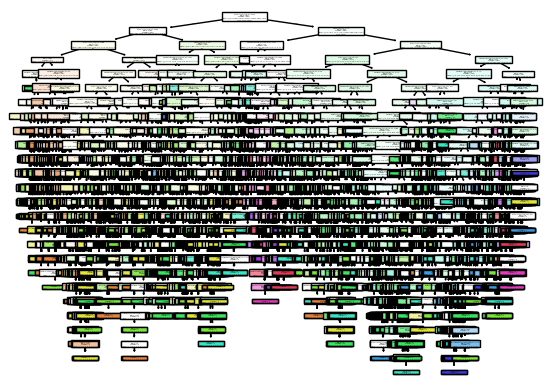

In [24]:
from sklearn import tree
tree.plot_tree(dt,feature_names=feature.columns,filled=True)
plt.show()

In [25]:
dt.get_depth()

25

In [26]:
parameters = {
    'max_depth': list(range(2,4)),
    'min_samples_split': list(range(2,4)),
    'min_samples_leaf': list(range(2,4))
}

In [27]:
from sklearn.model_selection import GridSearchCV 
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, verbose=2)
clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]},
             verbose=2)

In [28]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [29]:
clf= mymodel(clf.best_estimator_)
clf

Training Score : 0.3502272727272727
Testing Score : 0.33045454545454545
Confusion Matrix : 
    1    2    3    4    5   6   7   8   9   10
1   85   97   29   13    0   0   0   0   0   0
2   77  120   79   74    7   0   0   0   0   0
3   31  121  112  188   53   0   0   0   0   0
4   10   43   56  234  130   0   0   0   2   0
5    0   10   12  138  137   0   0   0   3   0
6    0    2    3   41   64   0   0   0   1   0
7    0    0    0   10   12   0   0   0   0   0
8    0    0    0   10   14   0   0   0  60   0
9    0    0    0    6   14   0   0   0  39   0
10   0    0    0    5    7   0   0   0  51   0
Classification Report : 
              precision    recall  f1-score   support

         1.0       0.42      0.38      0.40       224
         2.0       0.31      0.34      0.32       357
         3.0       0.38      0.22      0.28       505
         4.0       0.33      0.49      0.39       475
         5.0       0.31      0.46      0.37       300
         6.0       0.00      0.00      0.

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

## Phase 2: Anxiety Level Bucketing (Binary Classification)

To simplify the problem , anxiety levels were converted into **binary classes**:

- **0 → Low Anxiety (1–3)**
- **1 → High Anxiety (4–10)**

This transformation converted the task into a **binary classification problem**, which is more suitable for many machine learning algorithms.

---

In [30]:
def a(x):
    if x <=3:
        return 0
    else:
        return 1
    
df["Anxiety Level (1-10)"]=df["Anxiety Level (1-10)"].apply(a)


In [31]:
df["Anxiety Level (1-10)"].value_counts()

Anxiety Level (1-10)
1    5798
0    5202
Name: count, dtype: int64

In [32]:
features = df.drop(["Anxiety Level (1-10)"], axis=1)
target = df["Anxiety Level (1-10)"]

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=0)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(8800, 18) (8800,)
(2200, 18) (2200,)


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    # checking for overfit and underfit
    print(f'Training Score : {model.score(xtrain, ytrain)}')
    print(f'Testing Score : {model.score(xtest, ytest)}')
    # evaluation metrics
    c = pd.DataFrame(confusion_matrix(ytest, ypred),
                     index = ['Low','High'],
                     columns = ['Low','High'])
    print(f'Confusion Matrix : \n{c}')
    print(f'Classification Report : \n{classification_report(ytest, ypred)}')
    return model



## Logistic Regression (Binary Classification)

Logistic Regression was applied after feature scaling.

**Results:**
- Balanced training and testing accuracy (~80%)
- Good precision and recall for both classes
- No significant overfitting observed

**Why Logistic Regression worked well:**
- Binary target variable
- Linear decision boundary after scaling
- Probabilistic interpretation using the sigmoid function

This made Logistic Regression a strong and interpretable baseline model.

---

In [36]:
lm=mymodel(LogisticRegression())
lm

Training Score : 0.8088636363636363
Testing Score : 0.8013636363636364
Confusion Matrix : 
      Low  High
Low   809   213
High  224   954
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1022
           1       0.82      0.81      0.81      1178

    accuracy                           0.80      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.80      0.80      0.80      2200



LogisticRegression()

## Decision Tree Classifier (Binary Classification)

A Decision Tree classifier was trained on the binary target.

**Observations:**
- Initial overfitting with perfect training accuracy
- Pruning reduced variance and improved generalization
- Testing accuracy stabilized around ~72%

Feature importance analysis showed:
- **Stress Level (1–10)** as the most influential feature
- Lifestyle and health indicators also contributed significantly

---

In [37]:
dt=mymodel(DecisionTreeClassifier())

Training Score : 1.0
Testing Score : 0.7181818181818181
Confusion Matrix : 
      Low  High
Low   717   305
High  315   863
Classification Report : 
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1022
           1       0.74      0.73      0.74      1178

    accuracy                           0.72      2200
   macro avg       0.72      0.72      0.72      2200
weighted avg       0.72      0.72      0.72      2200



In [38]:
'''
check which features are most important for the Decision Tree model.
Feature importance scores show how much each feature contributes to the model’s decisions.
'''
d = {
    'Features':features.columns,
    'Importance':dt.feature_importances_
}
f = pd.DataFrame(d)
f


,Features,Importance
0,Age,0.045070
1,Gender,0.013893
2,Occupation,0.029392
3,Sleep Hours,0.077681
4,Physical Activity (hrs/week),0.058545
5,Caffeine Intake (mg/day),0.076864
6,Alcohol Consumption (drinks/week),0.043433
7,Smoking,0.009358
8,Family History of Anxiety,0.008208
9,Stress Level (1-10),0.421815


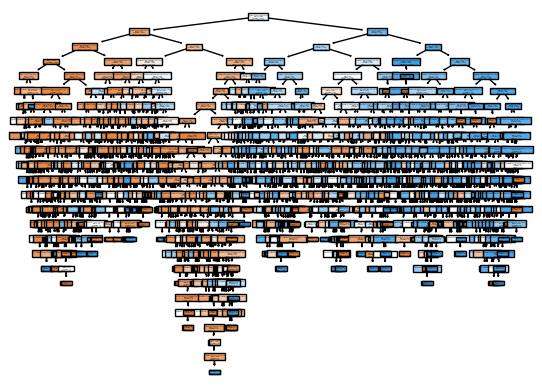

In [39]:
from sklearn import tree
tree.plot_tree(dt,feature_names=features.columns,filled=True)
plt.show()


In [40]:
dt.get_depth()

24

In [41]:
parameters = {
    'max_depth': list(range(2,4)),
    'min_samples_split': list(range(2,4)),
    'min_samples_leaf': list(range(2,4))
}

In [42]:
from sklearn.model_selection import GridSearchCV 
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, verbose=2)
clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]},
             verbose=2)

In [43]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [44]:
clf = mymodel(clf.best_estimator_)
clf

Training Score : 0.7973863636363636
Testing Score : 0.7795454545454545
Confusion Matrix : 
      Low  High
Low   750   272
High  213   965
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1022
           1       0.78      0.82      0.80      1178

    accuracy                           0.78      2200
   macro avg       0.78      0.78      0.78      2200
weighted avg       0.78      0.78      0.78      2200



DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [45]:
f['After Pruning Importance'] = clf.feature_importances_
f

,Features,Importance,After Pruning Importance
0,Age,0.045070,0.0
1,Gender,0.013893,0.0
2,Occupation,0.029392,0.0
3,Sleep Hours,0.077681,0.0
4,Physical Activity (hrs/week),0.058545,0.0
5,Caffeine Intake (mg/day),0.076864,0.0
6,Alcohol Consumption (drinks/week),0.043433,0.0
7,Smoking,0.009358,0.0
8,Family History of Anxiety,0.008208,0.0
9,Stress Level (1-10),0.421815,1.0


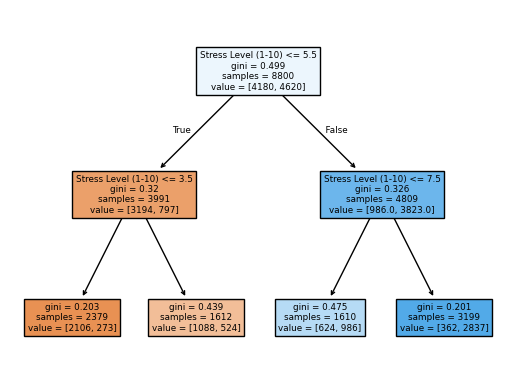

In [46]:
from sklearn import tree
tree.plot_tree(clf,feature_names=features.columns,filled=True)
plt.show()

## Random Forest Classifier (Binary Classification)

A Random Forest classifier was applied to reduce variance and improve robustness.

**Results:**
- Training accuracy close to 1.0
- Testing accuracy around **78%**
- More stable predictions compared to a single decision tree

Hyperparameter tuning using GridSearchCV helped control overfitting and improve generalization.

**Results:**
- Training accuracy close to **79%**
- Testing accuracy around **78%**

---

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
mymodel(RandomForestClassifier())

Training Score : 1.0
Testing Score : 0.7904545454545454
Confusion Matrix : 
      Low  High
Low   788   234
High  227   951
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1022
           1       0.80      0.81      0.80      1178

    accuracy                           0.79      2200
   macro avg       0.79      0.79      0.79      2200
weighted avg       0.79      0.79      0.79      2200



RandomForestClassifier()

In [49]:
# hyperparameter tuning

parameters = {
    'max_depth' : list(range(2,4)),
    'min_samples_split' : list(range(2,4)),
    'min_samples_leaf' : list(range(2,4)),
    'n_estimators' : [70,90,120,130]
}

In [50]:
# hyperparameter tuning where trying to find the right hyperparameter values.
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), parameters, verbose=2)
clf.fit(xtrain, ytrain) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=2, min_s

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [70, 90, 120, 130]},
             verbose=2)

In [51]:
clf.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=70)

In [52]:
c = mymodel(clf.best_estimator_)

Training Score : 0.7975
Testing Score : 0.78
Confusion Matrix : 
      Low  High
Low   744   278
High  206   972
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1022
           1       0.78      0.83      0.80      1178

    accuracy                           0.78      2200
   macro avg       0.78      0.78      0.78      2200
weighted avg       0.78      0.78      0.78      2200



## Model Comparison Summary

| Model                          | Problem Type | Recall |
|--------------------------------|--------------|--------|
| Decision Tree (Raw)            | Multi-class  | ~27%   |
| Decision Tree (Pruned)         | Multi-class  | ~33%   |
| Logistic Regression            | Binary       | ~80%   |
| Decision Tree (Raw)            | Binary       | ~74%   |
| Decision Tree (Pruned)         | Binary       | ~78%   |
| Random Forest (Default)        | Binary       | ~79%   |
| Random Forest (Tuned)          | Binary       | ~79%   |


## Final Model Selection

**Logistic Regression** was selected as the final model due to:
- Stable and consistent results
- Better interpretability of predictions
- Lower risk of overfitting on the data
- Faster training and inference time


## Conclusion

This project shows that:
- Predicting exact anxiety scores (1–10) is challenging and less reliable
- Grouping anxiety levels into broader categories improves model performance
- Proper preprocessing, encoding, scaling, and model selection play a key role
- Binary classification provides more consistent and useful results

The final model can support early identification of individuals with higher anxiety risk and help guide further evaluation.


In [53]:
import pickle

pickle.dump(lm, open("model.pkl", "wb"))
pickle.dump(enc, open("encoder.pkl", "wb"))
pickle.dump(ss, open("scaler.pkl", "wb"))


In [54]:
pickle.dump(feature.columns.tolist(), open("feature_columns.pkl", "wb"))
